## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data & Stats

In [2]:
from sklearn.datasets import fetch_california_housing

ca_housing = fetch_california_housing(as_frame=True)

print(ca_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
ca_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
ca_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
ca_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_housing = ca_housing.frame

print("Shape:", df_housing.shape)
print("Feature Names:", ca_housing.feature_names)
print("Target Name:", ca_housing.target_names)

Shape: (20640, 9)
Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target Name: ['MedHouseVal']


In [7]:
print("Data description:")
df_housing.describe()

Data description:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df_housing.isnull().sum())

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# Visualization of Data 

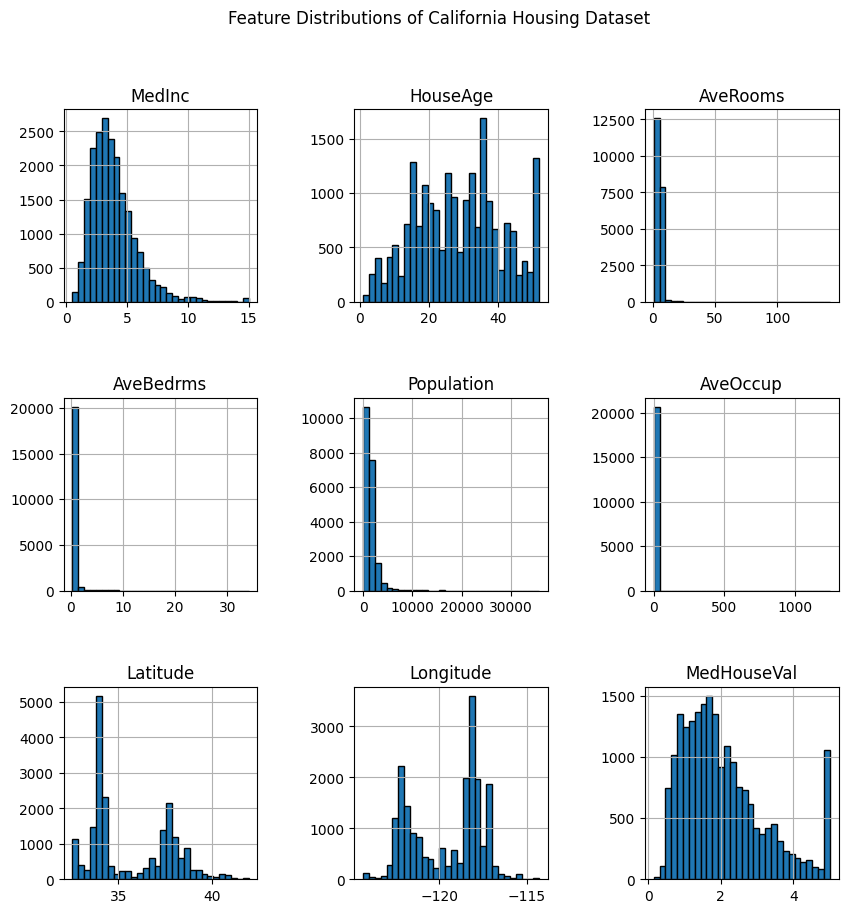

In [ ]:
# Feature distributions histograms
ca_housing.frame.hist(figsize=(10, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions of California Housing Dataset")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

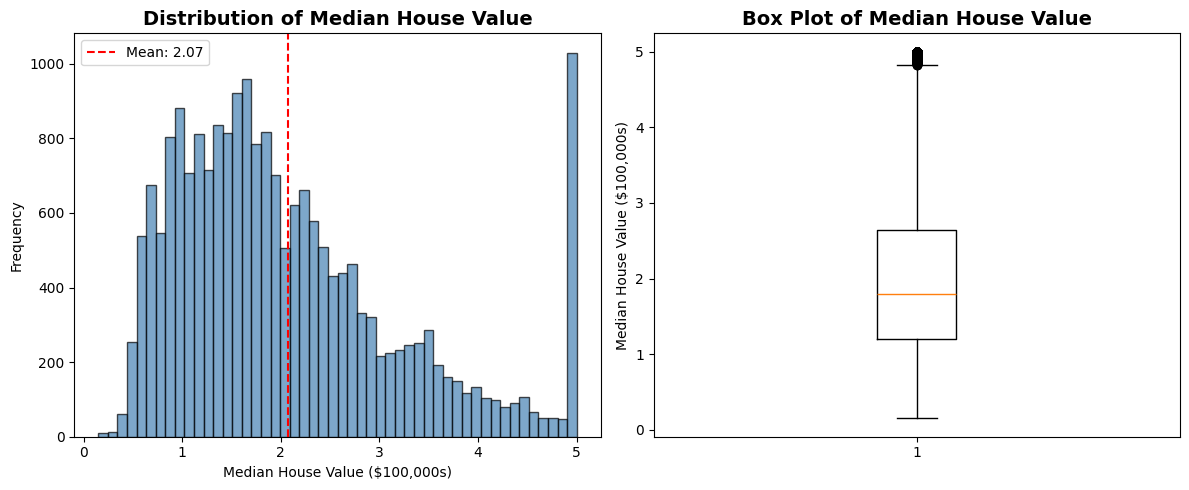

In [ ]:
# Target variable distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_housing['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.title('Distribution of Median House Value', fontsize=14, fontweight='bold')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.axvline(df_housing['MedHouseVal'].mean(), color='red', linestyle='--', label=f'Mean: {df_housing["MedHouseVal"].mean():.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df_housing['MedHouseVal'])
plt.title('Box Plot of Median House Value', fontsize=14, fontweight='bold')
plt.ylabel('Median House Value ($100,000s)')

plt.tight_layout()
plt.show()

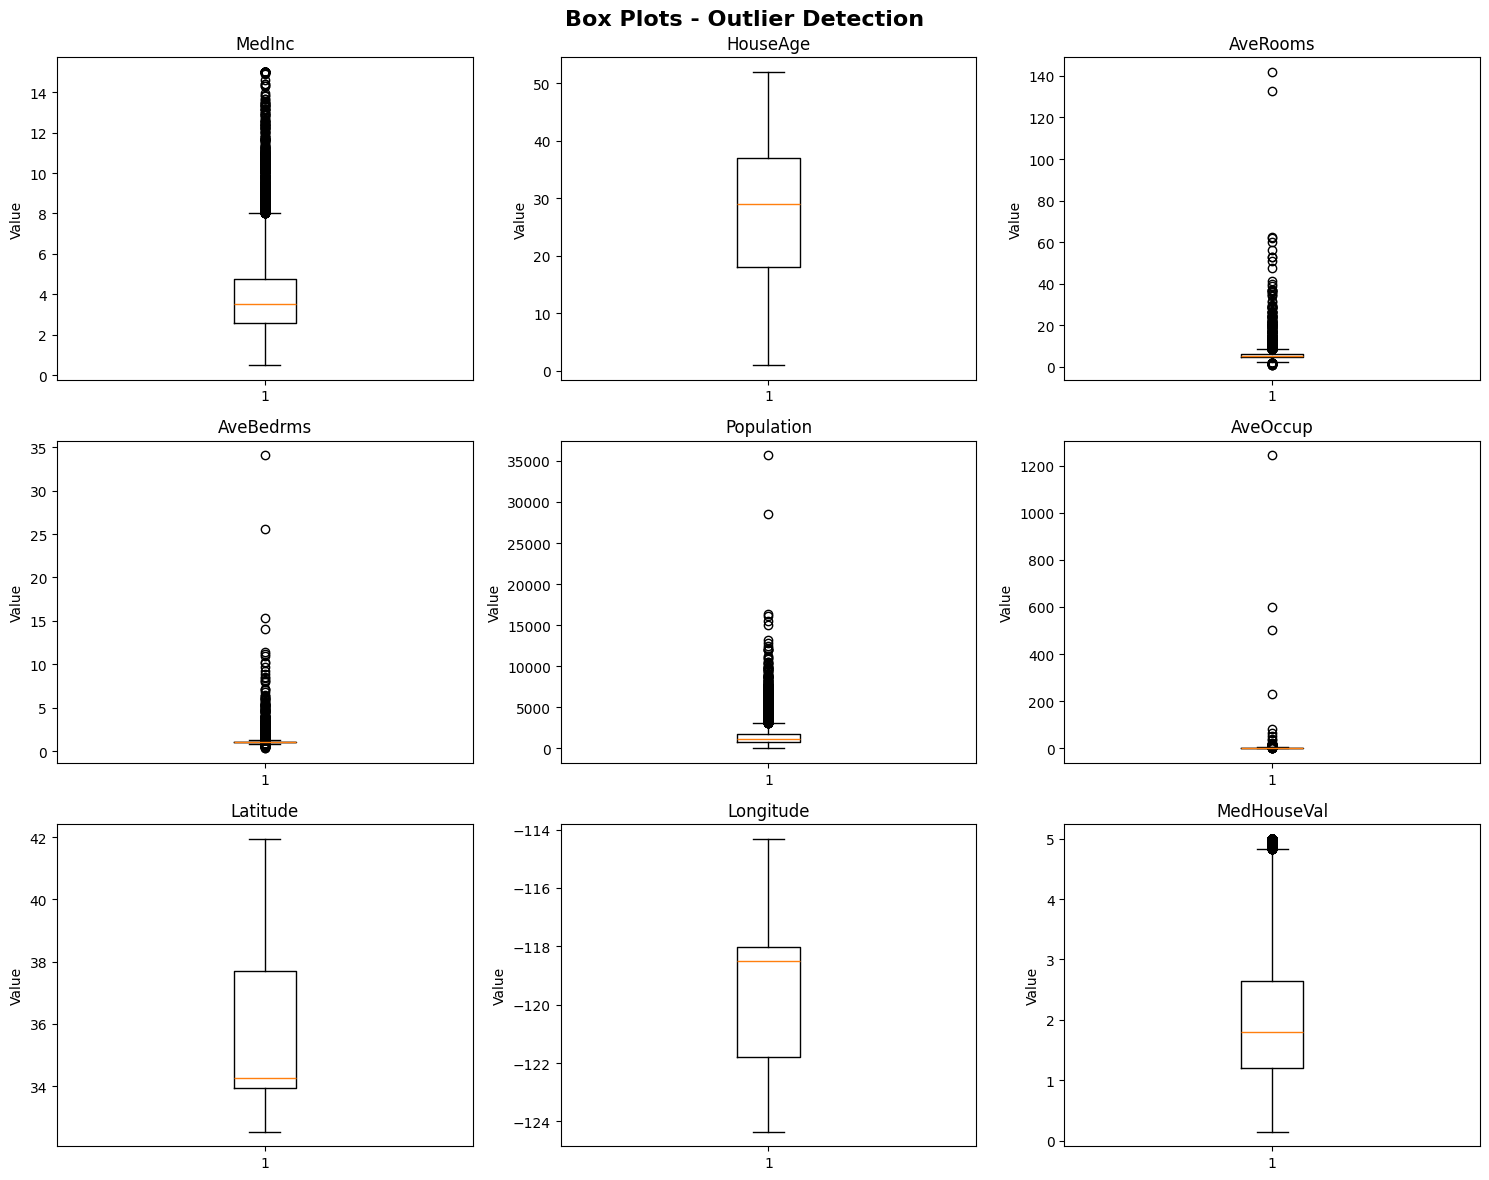

In [11]:
# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(df_housing.columns):
    axes[idx].boxplot(df_housing[col])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Value')
    
plt.tight_layout()
plt.show()

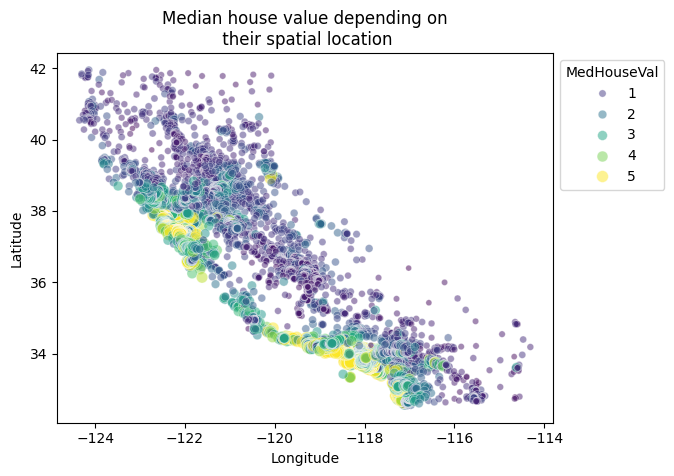

In [12]:
# scatter plot to visualize relationship between Latitude, Longitude and MedHouseVal
sns.scatterplot(
    data=df_housing,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Median house value depending on\n their spatial location")
plt.show()




--- Correlation with Target (MedHouseVal) ---
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


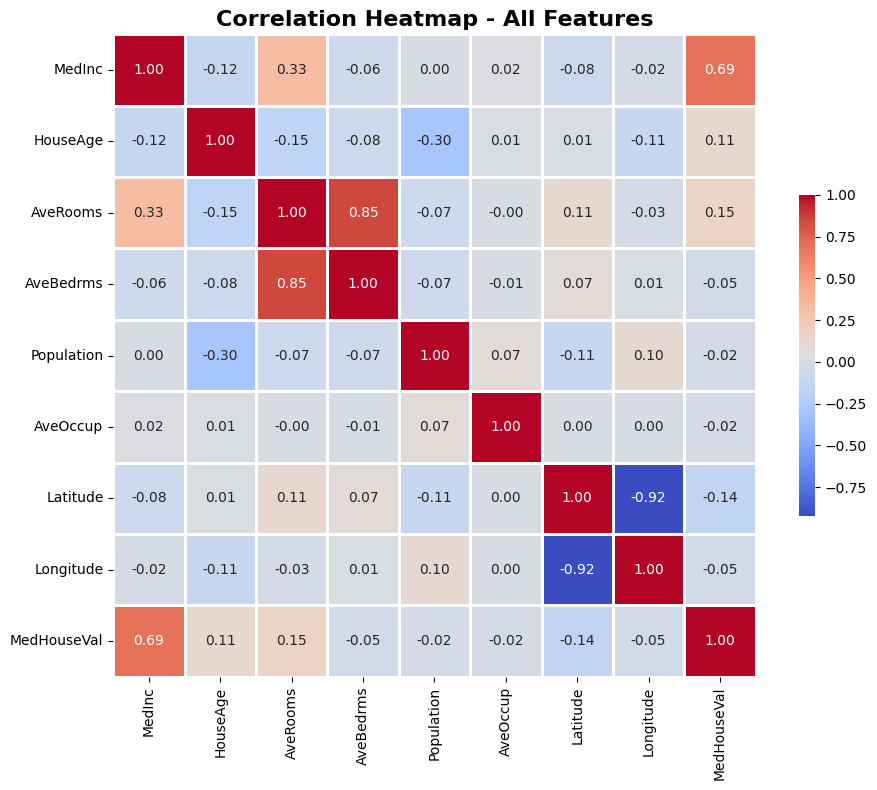

In [13]:
# Correlation matrix
corr_matrix = df_housing.corr()

# Display correlation with target
print("\n--- Correlation with Target (MedHouseVal) ---")
target_corr = corr_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)

# Full correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.5},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap - All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Splitting and Standardize the data

In [14]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
X = df_housing[selected_features]
y = df_housing['MedHouseVal']

print("Selected features shape:", X.shape)
print("Target shape:", y.shape)

Selected features shape: (20640, 6)
Target shape: (20640,)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("Y train shape:", y_train.shape)
print("Y test shape:", y_test.shape)

X train shape: (16512, 6)
X test shape: (4128, 6)
Y train shape: (16512,)
Y test shape: (4128,)


In [16]:
# Standardizing the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    # "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [18]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE, r2_score

In [19]:
results = []

for model_name, model in models.items():
    print(f"Training model: {model_name}")
    
    # train the model
    model.fit(X_train_scaled, y_train)
    
    # make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mae_train = MAE(y_train, y_train_pred)
    mae_test = MAE(y_test, y_test_pred)
    
    rmse_train = np.sqrt(MSE(y_train, y_train_pred))
    rmse_test = np.sqrt(MSE(y_test, y_test_pred))
    
    mape_train = MAPE(y_train, y_train_pred) * 100
    mape_test = MAPE(y_test, y_test_pred) * 100
    
    results.append({
        "Model Name": model_name,
        "Model" : model,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "MAPE Train (%)": mape_train,
        "MAPE Test (%)": mape_test
    })

    print(f"ended training model: {model_name}\n")
    
    # display metrics
    print(f"    Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")
    print(f"    Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print(f"    Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"    Train MAPE: {mape_train:.4f}, Test MAPE: {mape_test:.4f}")
    print("-" * 50)
    
    # if hasattr(model, 'feature_importances_'):
    #     print(f"\n Feature Importances for {model_name}:")
    #     importance = model.feature_importances_
    #     for i, v in enumerate(importance):
    #         print(f"    {selected_features[i]}: {v:.4f}")
        

Training model: Linear Regression
ended training model: Linear Regression

    Train R2: 0.6113, Test R2: 0.5750
    Train MAE: 0.5295, Test MAE: 0.5340
    Train RMSE: 0.7208, Test RMSE: 0.7463
    Train MAPE: 31.5599, Test MAPE: 31.9966
--------------------------------------------------
Training model: Random Forest
ended training model: Random Forest

    Train R2: 0.9731, Test R2: 0.8025
    Train MAE: 0.1242, Test MAE: 0.3322
    Train RMSE: 0.1896, Test RMSE: 0.5087
    Train MAPE: 6.9722, Test MAPE: 19.0449
--------------------------------------------------
Training model: Gradient Boosting
ended training model: Gradient Boosting

    Train R2: 0.7797, Test R2: 0.7507
    Train MAE: 0.3823, Test MAE: 0.3938
    Train RMSE: 0.5427, Test RMSE: 0.5716
    Train MAPE: 21.7144, Test MAPE: 22.6967
--------------------------------------------------


In [20]:
results_df = pd.DataFrame(results)

results_df.head()

# print("\n" + results_df.to_string(index=False))

,Model Name,Model,R2 Train,R2 Test,MAE Train,MAE Test,RMSE Train,RMSE Test,MAPE Train (%),MAPE Test (%)
0,Linear Regression,LinearRegression(),0.611293,0.574969,0.529532,0.533968,0.720844,0.746300,31.559929,31.996564
1,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.973112,0.802521,0.124237,0.332247,0.189589,0.508702,6.972154,19.044871
2,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.779659,0.750687,0.382270,0.393820,0.542721,0.571579,21.714367,22.696676


In [21]:
# find best model based on R2 score
chosen_model = max(results, key=lambda x: x['R2 Test'])
print(f"\n{'='*80}")
print(f"🏆 Best Model: {chosen_model['Model Name']} (R2 Test: {chosen_model['R2 Test']:.4f})")
print(f"{'='*80}")


🏆 Best Model: Random Forest (R2 Test: 0.8025)


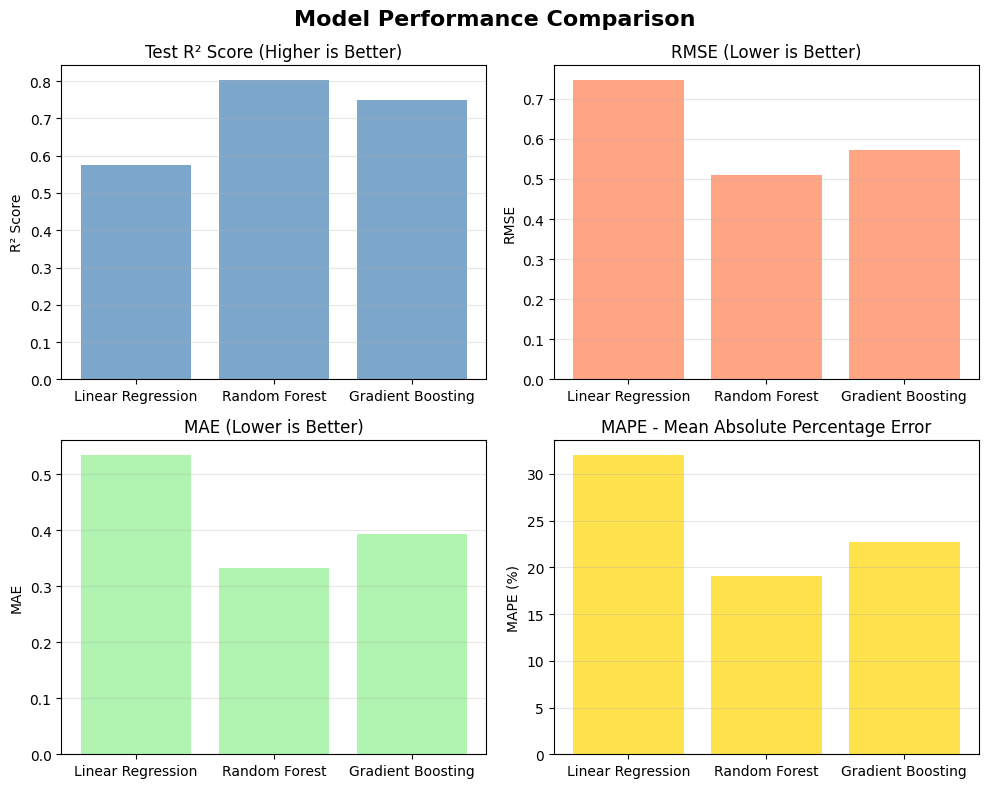

In [22]:
# Visualization: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# R² Scores
axes[0, 0].bar(results_df['Model Name'], results_df['R2 Test'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Test R² Score (Higher is Better)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# RMSE
axes[0, 1].bar(results_df['Model Name'], results_df['RMSE Test'], color='coral', alpha=0.7)
axes[0, 1].set_title('RMSE (Lower is Better)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# MAE
axes[1, 0].bar(results_df['Model Name'], results_df['MAE Test'], color='lightgreen', alpha=0.7)
axes[1, 0].set_title('MAE (Lower is Better)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)

# MAPE
axes[1, 1].bar(results_df['Model Name'], results_df['MAPE Test (%)'], color='gold', alpha=0.7)
axes[1, 1].set_title('MAPE - Mean Absolute Percentage Error')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

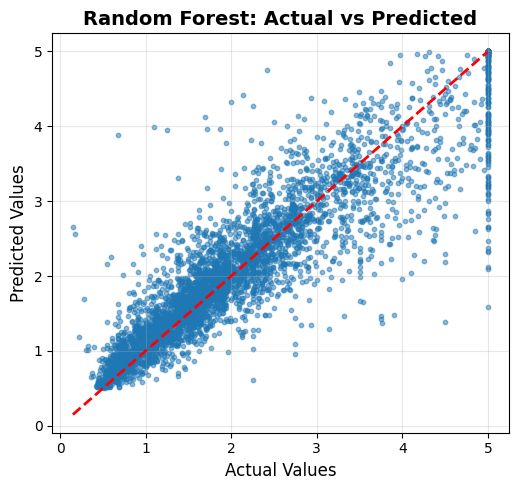

In [23]:
# Use the best_model_name
best_model_name = chosen_model['Model Name']  # Ensure this matches the best model name
best_model = chosen_model['Model']
y_pred = best_model.predict(X_test_scaled)

# Actual vs Predicted plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'{best_model_name}: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
import pickle

model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'model_name': best_model_name,
    'selected_features': selected_features,
    'metrics': {
        'R2 Test': chosen_model['R2 Test'],
        'MAE Test': chosen_model['MAE Test'],
        'RMSE Test': chosen_model['RMSE Test'],
        'MAPE Test (%)': chosen_model['MAPE Test (%)']
    }
}

output_file_name = "ca_housing_model_artifacts.pkl"

with open(output_file_name, 'wb') as f:
    pickle.dump(model_artifacts, f)
    
print(f"Model artifacts saved to {output_file_name}")

Model artifacts saved to ca_housing_model_artifacts.pkl
